In [1]:
try:
    import json
    import os
    
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

c:\Users\Shahryar Rza\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Shahryar
[nltk_data]     Rza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shahryar
[nltk_data]     Rza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shahryar
[nltk_data]     Rza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shahryar Rza\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
try:
    df=pd.read_csv("dataset.csv")
except ValueError as e:
    print("Error:", e)
    

<Axes: >

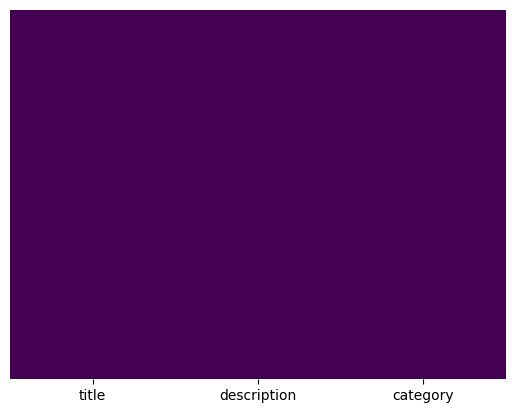

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
df.shape

(1214, 3)

In [6]:
df.head()

,title,description,category
0,"Toast will lay off 10% of its workforce, about...","Toast will lay off 10% of its workforce, about...",Technology
1,About that AMC Networks class action lawsuit s...,About that AMC Networks class action lawsuit s...,Entertainment
2,DoorDash Beats Estimates But Shares Fall After...,DoorDash Beats Estimates But Shares Fall After...,FoodAndDining
3,Retail sales fall 0.8% in January from Decembe...,Retail sales fall 0.8% in January from Decembe...,Retail
4,25+ Best Presidents Day Sales to Shop This Wee...,25+ Best Presidents Day Sales to Shop This Wee...,Retail


<Axes: xlabel='category'>

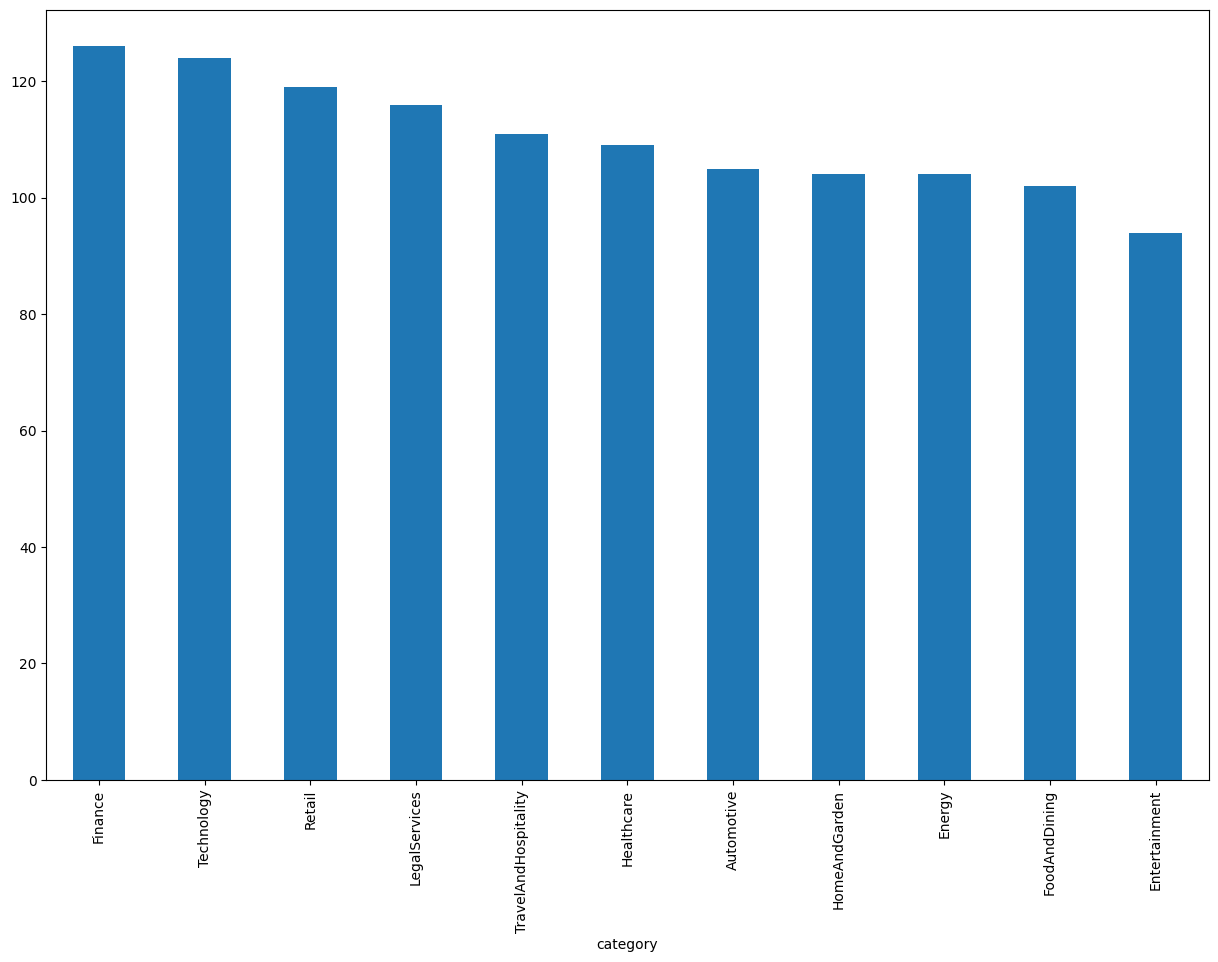

In [7]:
df['category'].value_counts().plot(kind='bar', figsize=(15,10))

In [8]:
df.columns

Index(['title', 'description', 'category'], dtype='object')

In [9]:
df.columns

Index(['title', 'description', 'category'], dtype='object')

In [10]:
df.describe()

,title,description,category
count,1214,1214,1214
unique,1150,1164,11
top,DIY Home Improvement Projects on the Rise,Multigenerational living arrangements are on t...,Finance
freq,4,2,126


In [11]:
df.isna().sum()

title          0
description    0
category       0
dtype: int64

In [12]:
df.head(2)

,title,description,category
0,"Toast will lay off 10% of its workforce, about...","Toast will lay off 10% of its workforce, about...",Technology
1,About that AMC Networks class action lawsuit s...,About that AMC Networks class action lawsuit s...,Entertainment


In [13]:
df['category'].unique()

array(['Technology', 'Entertainment', 'FoodAndDining', 'Retail',
       'Finance', 'LegalServices', 'TravelAndHospitality', 'Automotive',
       'HomeAndGarden', 'Healthcare', 'Energy'], dtype=object)

In [14]:
stop_words=set(stopwords.words('english'))
wn=WordNetLemmatizer()
my_sw=['make','amp','news','new','time','u','s','photos', 'get', 'say']
def black_txt(token):
    return token not in stop_words and token not in list(string.punctuation) and len(token)>=1 and token not in my_sw
def clean_txt(text):
    clean_txt = []
    clean_txt2 = []
    text=re.sub("'", "", text)
    clean_txt = [wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_txt2 = [word for word in clean_txt if black_txt(word)]
    return " ".join(clean_txt2)

In [15]:
def subj_txt(text):
    return TextBlob(text).sentiment[1]
def polarity_txt(text):
    return TextBlob(text).sentiment[0]
def len_text(text):
    if len(text.split()) > 0:
        return len(set(clean_txt(text).split()))/len(text.split())
    else:
        return 0

In [16]:
df.head()

,title,description,category
0,"Toast will lay off 10% of its workforce, about...","Toast will lay off 10% of its workforce, about...",Technology
1,About that AMC Networks class action lawsuit s...,About that AMC Networks class action lawsuit s...,Entertainment
2,DoorDash Beats Estimates But Shares Fall After...,DoorDash Beats Estimates But Shares Fall After...,FoodAndDining
3,Retail sales fall 0.8% in January from Decembe...,Retail sales fall 0.8% in January from Decembe...,Retail
4,25+ Best Presidents Day Sales to Shop This Wee...,25+ Best Presidents Day Sales to Shop This Wee...,Retail


In [17]:
df['text'] = df['title'] + " " + df['description']
df['text'] =df['text'].swifter.apply(clean_txt)
df['polarity'] = df['text'].swifter.apply(polarity_txt)
df['subjectivity'] = df['text'].swifter.apply(subj_txt)
df['len'] = df['text'].swifter.apply(lambda x: len(x))

Pandas Apply: 100%|██████████| 1214/1214 [00:00<?, ?it/s]


In [18]:
X = df[['text', 'polarity', 'subjectivity', 'len']]
y = df['category']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
v = dict(zip(list(y), df['category'].to_list()))

In [19]:
text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer="word", stop_words="english")),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB(alpha=.01)),
])

In [20]:
text_clf.fit(x_train['text'].to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [21]:
import numpy as np

In [22]:
X_TEST = x_test['text'].to_list()
Y_TEST = list(y_test)

In [23]:
predicted = text_clf.predict(X_TEST)

In [24]:
c = 0
for doc, category in zip(X_TEST, predicted):
    if c==2: break

    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    c= c+1

-------------------------------------------------------
smart home automation trend smart home devices become increasingly popular homeowners adopt automate systems light security temperature control entertainment enhance comfort convenience energy efficiency home
HomeAndGarden
-------------------------------------------------------
-------------------------------------------------------
real estate market trend watch 2024 key real estate market trend watch 2024 include rise home price inventory shortages evolve consumer preferences urban migration technological innovations trend shape house market landscape come year
HomeAndGarden
-------------------------------------------------------


In [25]:
np.mean(predicted == Y_TEST)

0.8106995884773662

In [26]:
docs_new=['Celebrating the holiday, Amazon is holding a Holi Fiesta from March 21 to the 26th. It has some great discounts on older phones along with offers on brand new models, plus we picked out some tablets.']
predicted = text_clf.predict(docs_new)
v[predicted[0]]

'FoodAndDining'